In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("C:\practice2.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
data_num=data[['price','bedrooms','bathrooms','sqft_living']]
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [10]:
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [13]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (21613, 4)


In [12]:
import sklearn.cluster as cluster

In [14]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
kmeans.labels_ 

array([0, 2, 0, ..., 0, 2, 0])

In [16]:
kmeans.cluster_centers_

array([[-0.46268193, -0.71628919, -0.85081897, -0.7851666 ],
       [ 1.96248106,  1.08723859,  1.5709582 ,  1.96722476],
       [-0.02006647,  0.3726444 ,  0.38479084,  0.24801401]])

In [17]:
kmeans.inertia_

39579.177056677894

In [18]:
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [19]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters


,Clusters,WSS
0,1,86452.000000
1,2,52447.331325
2,3,39579.047135
3,4,33321.573825
4,5,28928.526772
5,6,26256.713290
6,7,24195.671684
7,8,22135.215868
8,9,20838.902615
9,10,19607.686211


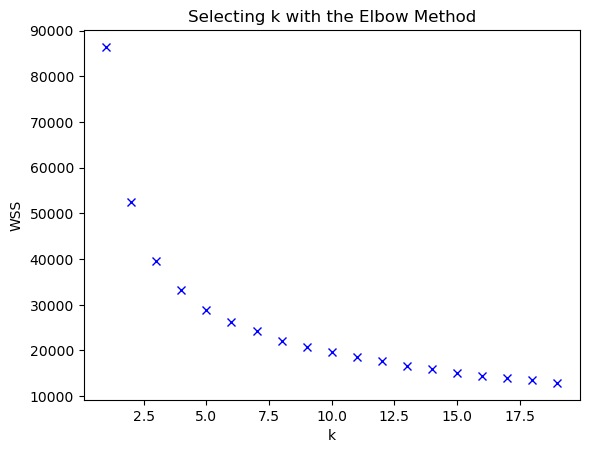

In [20]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [21]:
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
data['Clusters'] = labels
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Clusters
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [23]:
data.to_csv('Clusters8.csv', index = False)
data.groupby('Clusters').mean()


C:\Users\U.S\AppData\Local\Temp\ipykernel_3108\2113025469.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Clusters').mean()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Clusters,,,,,,,,,,,,,,,,,,,,
0,4.505531e+09,3.587552e+05,1.909388,1.183061,1095.271020,11473.281224,1.197755,0.006939,0.134286,3.386939,6.597551,996.226939,99.044082,1948.313061,85.931429,98108.712245,47.582426,-122.282878,1447.708980,9501.422041
1,4.625190e+09,7.805235e+05,3.694822,2.684871,2998.304531,22969.684142,1.785437,0.009061,0.442718,3.344984,8.798058,2616.791262,381.513269,1982.868608,138.476699,98067.780906,47.591977,-122.160783,2650.255663,18646.537864
2,4.661944e+09,4.672712e+05,2.911435,2.273297,1869.490486,13292.348213,1.634092,0.004624,0.169305,3.339676,7.618709,1621.000000,248.490486,1980.812378,68.518051,98075.067935,47.559574,-122.207098,1871.272097,11974.651787
3,4.624129e+09,6.412997e+05,5.354206,2.909579,3017.226168,15476.870093,1.603271,0.002804,0.307477,3.431776,8.082243,2362.795327,654.430841,1975.803738,112.066355,98071.447664,47.575247,-122.198356,2356.365421,12591.382243
4,4.488536e+09,3.424450e+05,3.108055,1.315162,1360.491604,11923.332684,1.141762,0.001217,0.064249,3.516671,6.837917,1243.682648,116.808956,1956.292529,56.801168,98084.091020,47.535386,-122.239179,1526.375030,10851.955464
5,4.214428e+09,2.893575e+06,4.534161,4.155280,5476.248447,28451.962733,1.928571,0.229814,1.981366,3.459627,10.944099,4349.937888,1126.310559,1976.080745,248.472050,98058.409938,47.618808,-122.225720,3573.807453,20423.298137
6,4.088648e+09,1.380691e+06,4.231781,3.448634,4097.920040,33140.131579,1.882085,0.043522,1.026316,3.360324,9.979757,3405.733806,692.186235,1984.904858,182.067814,98062.151822,47.608095,-122.182766,3209.962551,23667.552632
7,4.691954e+09,4.443003e+05,4.118632,2.216218,2121.164483,12081.929161,1.474891,0.000970,0.118632,3.463367,7.503882,1772.750121,348.414362,1972.111596,55.140708,98071.283115,47.530310,-122.207817,1974.043426,10431.761766


In [26]:
import cluster_profiles

ModuleNotFoundError: No module named 'cluster_profiles'

In [27]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

NameError: name 'cluster_profiles' is not defined

In [28]:
cluster_profiles.get_profiles(data=data_num.copy(),kmeans=kmeans)

NameError: name 'cluster_profiles' is not defined

In [29]:
kmeans.labels_

array([12, 13,  2, ...,  2,  7,  2])

In [30]:
data['Clusters'] = kmeans.labels_

In [31]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Clusters
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,6
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,8


In [32]:
data.groupby(['Clusters']).mean()[['price','bedrooms','sqft_living']]


C:\Users\U.S\AppData\Local\Temp\ipykernel_3108\3499348306.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Clusters']).mean()[['price','bedrooms','sqft_living']]


,price,bedrooms,sqft_living
Clusters,,,
0,4.364372e+05,1.972191,1452.040044
1,7.071551e+05,4.009363,2983.888889
2,3.405941e+05,1.896929,1010.292556
3,3.325137e+05,3.000000,1489.957346
4,8.069254e+05,5.418891,3608.944559
5,2.670752e+06,4.365385,4953.262821
6,4.138368e+05,4.000903,2216.776423
7,4.036724e+05,2.995883,1786.616766
8,6.363286e+05,2.964539,1961.605201
